   BOROUGH               NEIGHBORHOOD  \
0        4  KEW GARDENS                 
1        1               MIDTOWN EAST   
2        3  CANARSIE                    
3        1  TRIBECA                     
4        3  BEDFORD STUYVESANT          

                        BUILDING_CLASS_CATEGORY  \
0  17  CONDOPS                                    
1               13 CONDOS - ELEVATOR APARTMENTS   
2  02  TWO FAMILY HOMES                           
3  28  COMMERCIAL CONDOS                          
4  02  TWO FAMILY HOMES                           

                                     ADDRESS  ZIP_CODE  LAND_SQUARE_FEET  \
0  123-25 82ND   AVENUE, 4P                    11415.0               0.0   
1                   309 EAST 49TH STREET, 2E   10017.0               0.0   
2  955 EAST 106 STREET                         11236.0            2000.0   
3  28 LAIGHT STREET                            10013.0               0.0   
4  833A PUTNAM AVENUE                          11221.0            

C:\Users\vohoa\AppData\Local\Temp\ipykernel_9960\3602468731.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lon'].fillna(df['lon'].mean(), inplace=True)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_9960\3602468731.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

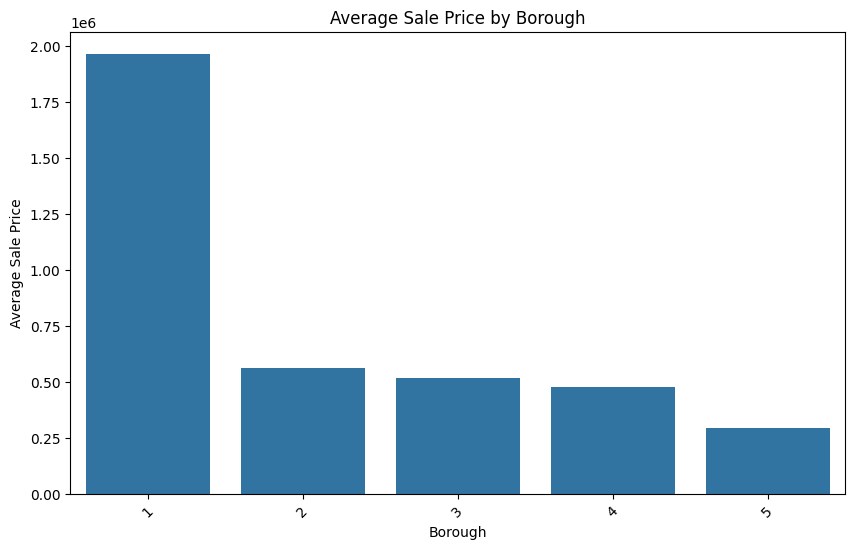

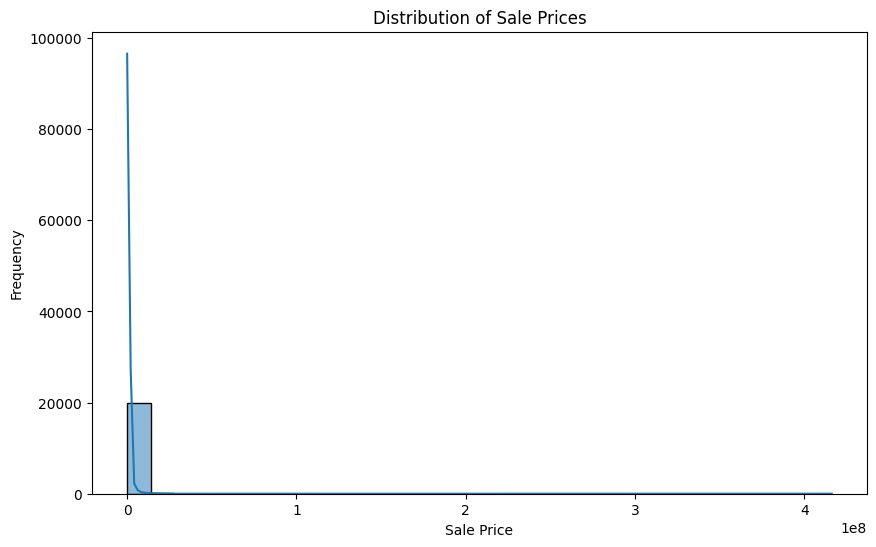

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'data/geography.csv'  # Replace with your actual data path
df = pd.read_csv(data_path)

# Step 2: Inspect the Data
print(df.head())  # Display the first few rows
print(df.info())  # Check the data types and non-null counts
print(df.isnull().sum())  # Check for missing values



In [3]:


# Handle missing values
# Filling missing longitude and latitude with mean values
df['lon'].fillna(df['lon'].mean(), inplace=True)
df['lat'].fillna(df['lat'].mean(), inplace=True)

# Drop rows with any remaining missing values in critical columns
df.dropna(subset=['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY'], inplace=True)

# Convert SALE_DATE to datetime format
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], errors='coerce')

# Grouping by borough to see the average sale price
borough_analysis = df.groupby('BOROUGH')['SALE_PRICE'].mean().reset_index()



C:\Users\vohoa\AppData\Local\Temp\ipykernel_9960\932421359.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lon'].fillna(df['lon'].mean(), inplace=True)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_9960\932421359.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [4]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,ZIP_CODE,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE,Normalized_ADDRESS,Mapbox_ADDRESS,lon,lat
0,4,KEW GARDENS,17 CONDOPS,"123-25 82ND AVENUE, 4P",11415.0,0.0,0.0,1951.0,110000,2008-05-13,"123-25 82nd avenue,4p","new york, 123-25 82nd avenue,4p",-76.286575,40.630859
1,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,"309 EAST 49TH STREET, 2E",10017.0,0.0,0.0,1982.0,1250000,2019-09-03,"309 east 49th street,2e","new york, 309 east 49th street,2e",-76.286575,40.630859
2,3,CANARSIE,02 TWO FAMILY HOMES,955 EAST 106 STREET,11236.0,2000.0,2320.0,1960.0,0,2008-11-12,955 east 106 street,"new york, 955 east 106 street",-76.286575,40.630859
3,1,TRIBECA,28 COMMERCIAL CONDOS,28 LAIGHT STREET,10013.0,0.0,0.0,0.0,150000,2004-05-24,28 laight street,"new york, 28 laight street",-74.007065,40.722080
4,3,BEDFORD STUYVESANT,02 TWO FAMILY HOMES,833A PUTNAM AVENUE,11221.0,2000.0,2700.0,1899.0,368000,2003-04-21,833a putnam avenue,"new york, 833a putnam avenue",-73.928060,40.686790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4,ARVERNE,03 THREE FAMILY HOMES,347 BEACH 47 STREET,11691.0,2853.0,1958.0,1970.0,165000,2009-10-13,347 beach 47 street,"new york, 347 beach 47 street",-73.778450,40.595370
19996,4,EAST ELMHURST,01 ONE FAMILY DWELLINGS,26-51 94TH STREET,11369.0,2568.0,2340.0,1925.0,0,2014-02-12,26-51 94th street,"new york, 26-51 94th street",-73.874775,40.761470
19997,3,OCEAN PARKWAY-SOUTH,03 THREE FAMILY DWELLINGS,62 VILLAGE ROAD NORTH,11223.0,2800.0,3600.0,2004.0,340000,2019-02-13,62 village road north,"new york, 62 village road north",-73.972725,40.596305
19998,4,BAYSIDE,10 COOPS - ELEVATOR APARTMENTS,"220-55 46TH AVENUE, 2M",11361.0,0.0,0.0,1961.0,220000,2006-02-14,"220-55 46th avenue,2m","new york, 220-55 46th avenue,2m",-73.759090,40.760706
